### As the filter is moved from one spatial location to the next one, the filter window shares many common pixels in adjacent neighborhoods. Exploit this observation and implement a more efficient version of averaging filter. To appreciate the benefits of doing so, generate a plot of k vs run-time for various sized images. The plot diagram should contain a line plot for each image size you pick.

In [69]:
%matplotlib inline

import cv2
import numpy as np
from matplotlib import pyplot as plt
import math
import time

In [70]:
i1 = './A2_resources/cameraman.png'

img1 = cv2.imread(i1, 0)
img1 = img1.astype(np.uint16)

In [71]:
def im2col(A, block, stepsize=1):
    m,n = A.shape
    s0, s1 = A.strides    
    nrows = m-block[0]+1
    ncols = n-block[1]+1
    shp = block[0],block[1],nrows,ncols
    strd = s0,s1,s0,s1

    out_view = np.lib.stride_tricks.as_strided(A, shape=shp, strides=strd)
    return out_view.reshape(block[0]*block[1],-1)[:,::stepsize]

In [72]:
def average(img, k):
    a1, a2 = img.shape
    
    imcol = im2col(img, (a1-k+1,a2-k+1))
    y = np.sum(imcol, axis = 1)
    y = y.reshape(a1-k+1, a2-k+1)
    
    return y

In [73]:
def average_eff(img, k):
    x, y = img.shape
    arr = np.cumsum(np.cumsum(img, axis = 0), axis = 1)
    
    a = arr[k-1:x,k-1:y]
    b = arr[k-1:x,0:y-k+1]
    c = arr[0:x-k+1,k-1:y]
    d = arr[0:x-k+1,0:y-k+1]
    
    output = a + d - b - c
    
    return output
    

In [82]:
k = [3,5,7,9,11,13,15,17,19,21,23,25,27,29,31]
arr_average = []
arr_eff_average = []

for k_val in k:
    s1 = time.time()
    img2 = average(img1, k_val)
    e1 = time.time()
    t1 = e1 - s1
    arr_average.append(t1)

    s2 = time.time()
    img3 = average_eff(img1, k_val)
    e2 = time.time()
    t2 = e2 - s2
    arr_eff_average.append(t2)

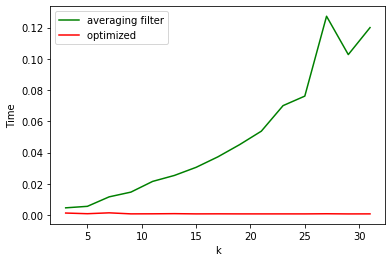

In [83]:
plt.plot(k, arr_average, 'g', label='averaging filter')
plt.plot(k, arr_eff_average, 'r', label='optimized ')
plt.xlabel("k")
plt.ylabel("Time")
plt.legend()
plt.show()

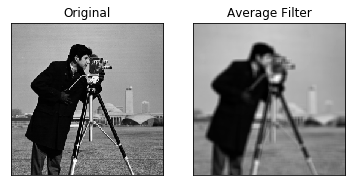

In [58]:
plt.subplot(121),plt.imshow(img1, cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img2, cmap = 'gray')
plt.title('Average Filter'), plt.xticks([]), plt.yticks([])
plt.show()

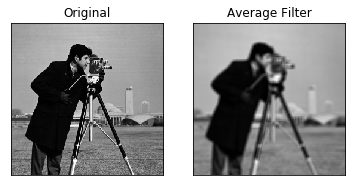

In [59]:
plt.subplot(121),plt.imshow(img1, cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img3, cmap = 'gray')
plt.title('Average Filter'), plt.xticks([]), plt.yticks([])
plt.show()